## Kütüphanelerin İndirimesi


In [2]:
import numpy as np # lineer cebir işlemleri
import pandas as pd # data işleme süreci, CSV uzantılı dosya işlemleri
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
from scipy.stats import norm, skew # bazı istatistiksel hesaplamalar için
import cufflinks as cf
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import researchpy as rp
from yellowbrick.features import Rank1D
from sklearn.preprocessing import MinMaxScaler
from scipy.special import boxcox1p
from sklearn.preprocessing import LabelEncoder
from yellowbrick.regressor import AlphaSelection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

## Veri Setinin Anaconda JupyterLab Platformuna Alınması İşlemi

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Veri Gönderi ve İşlem Amacıyla Ayrıştırılması İşlemi (ID veri primary key olması sebebiyle analizlere dahil edilmemiştir)

In [4]:
#Gönderi hazırlanırken lazım olacağı için veri setlerindeki örneklerin
# id numaralarını tutuyoruz
train_ids=train['Id']
test_ids=test['Id']

# Makine öğrenemsi modelleri için id numarasının anlamı olmadığı için
# veri setinden çıkartıyoruz
train.drop('Id',axis=1, inplace=True)
test.drop('Id',axis=1, inplace=True)

## Tüm Eğitim Verisi

In [4]:
train


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Tüm Test Verisi

In [5]:
test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


## Eğitim Verisi Gözlem Formu

In [6]:
train.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Eğitim Verisinin Satır ve Sütun Aralık Sayılarının Analizi

In [7]:
print('Eğitim Veri Seti Satır Sayısı', train.shape[0])
print('Eğitim Veri Seti Sütun Sayısı:',train.shape[1])

Eğitim Veri Seti Satır Sayısı 1460
Eğitim Veri Seti Sütun Sayısı: 80


In [8]:
train.shape

(1460, 80)

Yapılan gözlem sonucunda üzere eğitim veri seti 1460 gözlem (satır) ve 81 özellik (sütun)'dan oluştuğu tespit edilmiştir.

In [9]:
test.shape

(1459, 79)

Yapılan gözlem sonucunda üzere test veri seti 1459 gözlem (satır) ve 80 özellik (sütun)'dan oluştuğu tespit edilmiştir.

In [10]:
train.size

116800

In [11]:
test.size

115261

## Verinin Satır ve Sütun Veri Tiplerinin Analizi

In [12]:
print('Eğitim Veri Seti Sütunları:\n')
print(train.dtypes)

Eğitim Veri Seti Sütunları:

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object


## Veri Seti Yapısal Bilgileri

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Yukarıdaki çıktıdan anlağıldığı kadarı ile, eğitim veri setimizde ; 3  noktalı(float) veri tipinden, 35 sayısal(int) veri tipinden, 43  nesne(object) veri tipinden olmak üzere toplamda 81 adet 3 veri türlü bir veri seti mevcuttur.

## Test Verisi Gözlem Formu

In [14]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Test Verisinin Satır ve Sütun Aralık Sayılarının Analizi

In [15]:
print('Test Veri Seti Satır Sayısı:', test.shape[0])
print('Test Veri Seti Sütun Sayısı:',test.shape[1])

Test Veri Seti Satır Sayısı: 1459
Test Veri Seti Sütun Sayısı: 79


## Eğitim Ver Seti Dahilinde Satış Fiyatı Betimleyici İstatistikleri

In [15]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Eğitim Seti Betimleyici İstatistikleri

In [16]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


## Eğitim Verisi Konut Satış Fiyatları Dağılım İnceleme

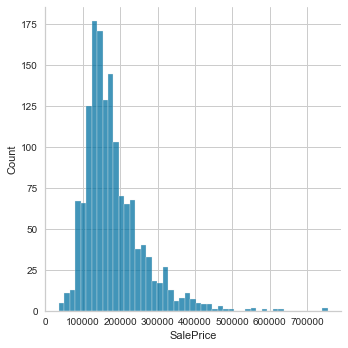

In [17]:
sns.displot(data=train, x="SalePrice");

## Eğitim Verisi Konut Satış Fiyatları Normallik Dağılım(Normality) İncelemeleri

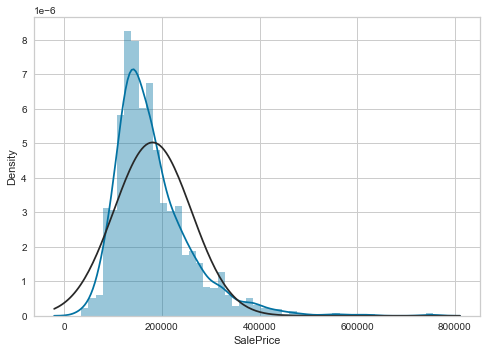

In [19]:
sns.distplot(train.SalePrice,fit=norm);

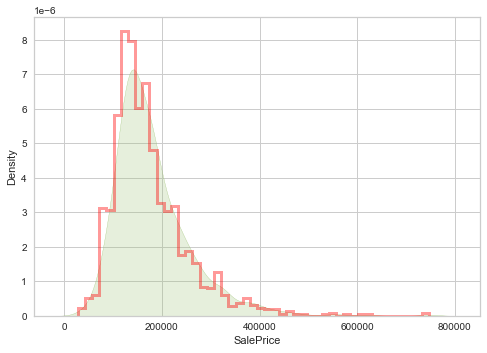

In [18]:
sns.distplot(a=train['SalePrice'],hist_kws={'histtype':'step','align':'left','color':'red','lw':3},
                                  kde_kws={'color':'g','shade':True})
plt.show()



 Aritmetik Ortalama = 180921.20 and Standart Sapma = 79415.29



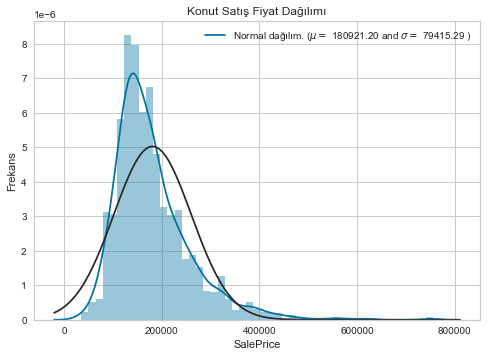

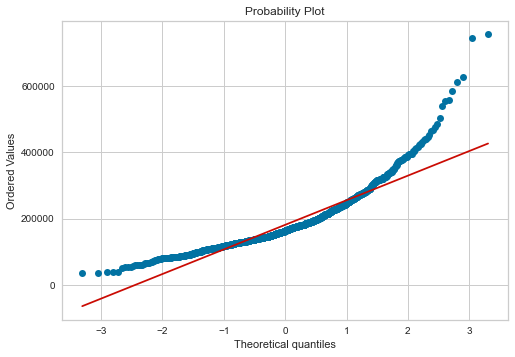

In [19]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n Aritmetik Ortalama = {:.2f} and Standart Sapma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dağılım. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frekans')
plt.title('Konut Satış Fiyat Dağılımı')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show() 

## Logoritmik Dönüşüm ile Verinin Normalleştirilmesi

 Numpy Kütüphasinde bulunan logaritmik dönüşüm formülü ile lograitmik dönüşümü gerçekleştirdik.

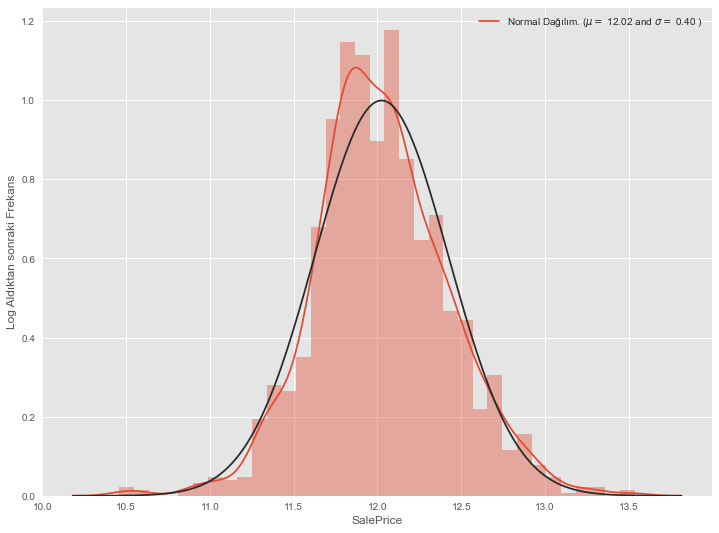

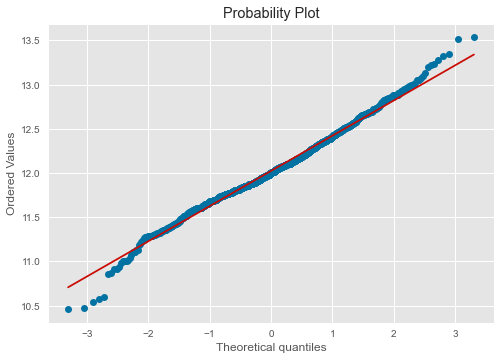

In [26]:

train['SalePrice'] = np.log1p(train['SalePrice'])

# normal dağılımı kontrol edilmesi tablolandırılması

plt.subplots(figsize =(12, 9))
sns.distplot(train['SalePrice'], fit = stats.norm)


(mu, sigma) = stats.norm.fit(train['SalePrice'])

#Dağılımın görselleştirilmesi
plt.legend(['Normal Dağılım. ($\mu=$ {:.2f} and $\sigma = $ {:.2f} )' .format(mu, sigma)], loc = 'best')
plt.ylabel('Log Aldıktan sonraki Frekans')

#Olasılık durumunun görselleştirilmesi
fig = plt.figure()
stats.probplot(train['SalePrice'], plot = plt)
plt.show()

Verilerin istatistiksel dağılımı logoritmik dönüşüm ile normal dağılım formuna dönüştürülmüştür.

## Normalleştirilmiş Verinin İncelenmesi

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

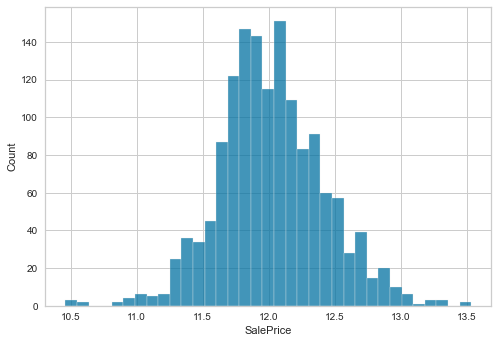

In [20]:
sns.histplot(np.log1p(train['SalePrice']))

### Numeric Veri Tipine Sahip Değişkenlerin Tespiti

In [21]:
train_numeric=train.select_dtypes(include=["float64","int64"])
train_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


## Numeric Veri Tipine Sahip Değişkenlerin Betimleyici İstatistikleri

In [22]:
train_numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [30]:
rp.summary_cont(train["SalePrice"])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,SalePrice,1460.0,12.0241,0.3994,0.0105,12.0036,12.0446


In [31]:
rp.summary_cont(train[["YrSold","MiscVal"]])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,YrSold,1460.0,2007.8158,1.3281,0.0348,2007.7476,2007.8839
1,MiscVal,1460.0,43.4890,496.1230,12.9841,18.0195,68.9586


## Eğitim Veri Seti Verileri Arası Korelasyon Analizi Sonuçları-Heatmap Tablosu

In [75]:
train.corr().style.background_gradient(cmap='coolwarm').set_precision(4)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.0000,-0.3863,-0.1398,0.0326,-0.0593,0.0279,0.0406,0.0229,-0.0698,-0.0656,-0.1408,-0.2385,-0.2518,0.3079,0.0465,0.0749,0.0035,-0.0023,0.1316,0.1774,-0.0234,0.2817,0.0404,-0.0456,0.0851,-0.0401,-0.0987,-0.0126,-0.0061,-0.0120,-0.0438,-0.0260,0.0083,-0.0077,-0.0136,-0.0214,-0.0740
LotFrontage,-0.3863,1.0000,0.4261,0.2516,-0.0592,0.1233,0.0889,0.1935,0.2336,0.0499,0.1326,0.3921,0.4572,0.0802,0.0385,0.4028,0.1009,-0.0072,0.1988,0.0535,0.2632,-0.0061,0.3521,0.2666,0.0702,0.2857,0.3450,0.0885,0.1520,0.0107,0.0700,0.0414,0.2062,0.0034,0.0112,0.0074,0.3559
LotArea,-0.1398,0.4261,1.0000,0.1058,-0.0056,0.0142,0.0138,0.1042,0.2141,0.1112,-0.0026,0.2608,0.2995,0.0510,0.0048,0.2631,0.1582,0.0480,0.1260,0.0143,0.1197,-0.0178,0.1900,0.2714,-0.0249,0.1549,0.1804,0.1717,0.0848,-0.0183,0.0204,0.0432,0.0777,0.0381,0.0012,-0.0143,0.2573
OverallQual,0.0326,0.2516,0.1058,1.0000,-0.0919,0.5723,0.5507,0.4119,0.2397,-0.0591,0.3082,0.5378,0.4762,0.2955,-0.0304,0.5930,0.1111,-0.0402,0.5506,0.2735,0.1017,-0.1839,0.4275,0.3968,0.5478,0.6007,0.5620,0.2389,0.3088,-0.1139,0.0304,0.0649,0.0652,-0.0314,0.0708,-0.0273,0.8172
OverallCond,-0.0593,-0.0592,-0.0056,-0.0919,1.0000,-0.3760,0.0737,-0.1281,-0.0462,0.0402,-0.1368,-0.1711,-0.1442,0.0289,0.0255,-0.0797,-0.0549,0.1178,-0.1941,-0.0608,0.0130,-0.0870,-0.0576,-0.0238,-0.3243,-0.1858,-0.1515,-0.0033,-0.0326,0.0704,0.0255,0.0548,-0.0020,0.0688,-0.0035,0.0439,-0.0369
YearBuilt,0.0279,0.1233,0.0142,0.5723,-0.3760,1.0000,0.5929,0.3157,0.2495,-0.0491,0.1490,0.3915,0.2820,0.0103,-0.1838,0.1990,0.1876,-0.0382,0.4683,0.2427,-0.0707,-0.1748,0.0956,0.1477,0.8257,0.5379,0.4790,0.2249,0.1887,-0.3873,0.0314,-0.0504,0.0049,-0.0344,0.0124,-0.0136,0.5866
YearRemodAdd,0.0406,0.0889,0.0138,0.5507,0.0737,0.5929,1.0000,0.1796,0.1285,-0.0678,0.1811,0.2911,0.2404,0.1400,-0.0624,0.2874,0.1195,-0.0123,0.4390,0.1833,-0.0406,-0.1496,0.1917,0.1126,0.6423,0.4206,0.3716,0.2057,0.2263,-0.1939,0.0453,-0.0387,0.0058,-0.0103,0.0215,0.0357,0.5656
MasVnrArea,0.0229,0.1935,0.1042,0.4119,-0.1281,0.3157,0.1796,1.0000,0.2647,-0.0723,0.1144,0.3639,0.3445,0.1746,-0.0691,0.3909,0.0853,0.0267,0.2768,0.2014,0.1028,-0.0376,0.2807,0.2491,0.2527,0.3642,0.3731,0.1597,0.1257,-0.1102,0.0188,0.0615,0.0117,-0.0298,-0.0060,-0.0082,0.4308
BsmtFinSF1,-0.0698,0.2336,0.2141,0.2397,-0.0462,0.2495,0.1285,0.2647,1.0000,-0.0501,-0.4953,0.5224,0.4459,-0.1371,-0.0645,0.2082,0.6492,0.0674,0.0585,0.0043,-0.1074,-0.0810,0.0443,0.2600,0.1535,0.2241,0.2970,0.2043,0.1118,-0.1023,0.0265,0.0620,0.1405,0.0036,-0.0157,0.0144,0.3720
BsmtFinSF2,-0.0656,0.0499,0.1112,-0.0591,0.0402,-0.0491,-0.0678,-0.0723,-0.0501,1.0000,-0.2093,0.1048,0.0971,-0.0993,0.0148,-0.0096,0.1587,0.0709,-0.0764,-0.0321,-0.0157,-0.0408,-0.0352,0.0469,-0.0880,-0.0383,-0.0182,0.0679,0.0031,0.0365,-0.0300,0.0889,0.0417,0.0049,-0.0152,0.0317,0.0048


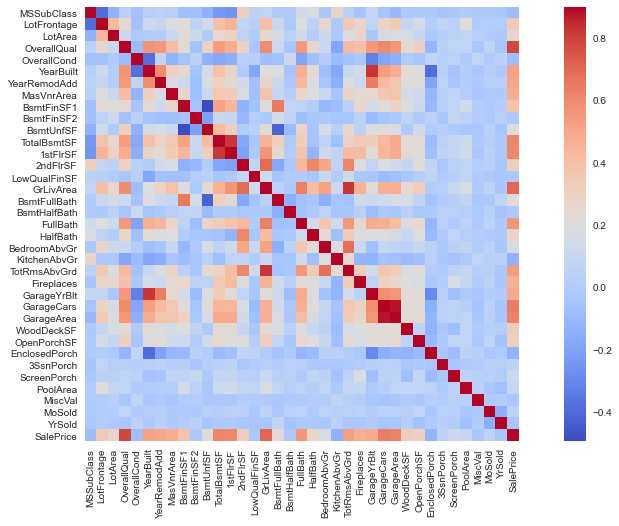

In [23]:
corrstatistics = train.corr()
f, ax = plt.subplots(figsize=(16,8))
sns.heatmap(corrstatistics, cmap='coolwarm', vmax=0.9, square=True);

In [25]:
#Verilerimizin içerisinden sadece sayısal verisetini ayıralım yukarıdaka görmüştük, 81 tane sütundan 38 tanesi sayısal veri içeriyordu
train_corr = train.select_dtypes(include = [np.number])

In [26]:
train_corr.shape

(1460, 37)

In [35]:
print('Hedef değişken(SalePrice) ile en iyi ilişkisi olan değişkeni bulalım')
corr = train.corr()
corr.sort_values(['SalePrice'], ascending = False, inplace = True)

corr.SalePrice

Hedef değişken(SalePrice) ile en iyi ilişkisi olan değişkeni bulalım


SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64

## SalePrice ile Korelasyonları En Yüksek Seviyede Olan Değişkenlerin Histogram ve Scatter Plot Grafikleriyle İncelenmesi

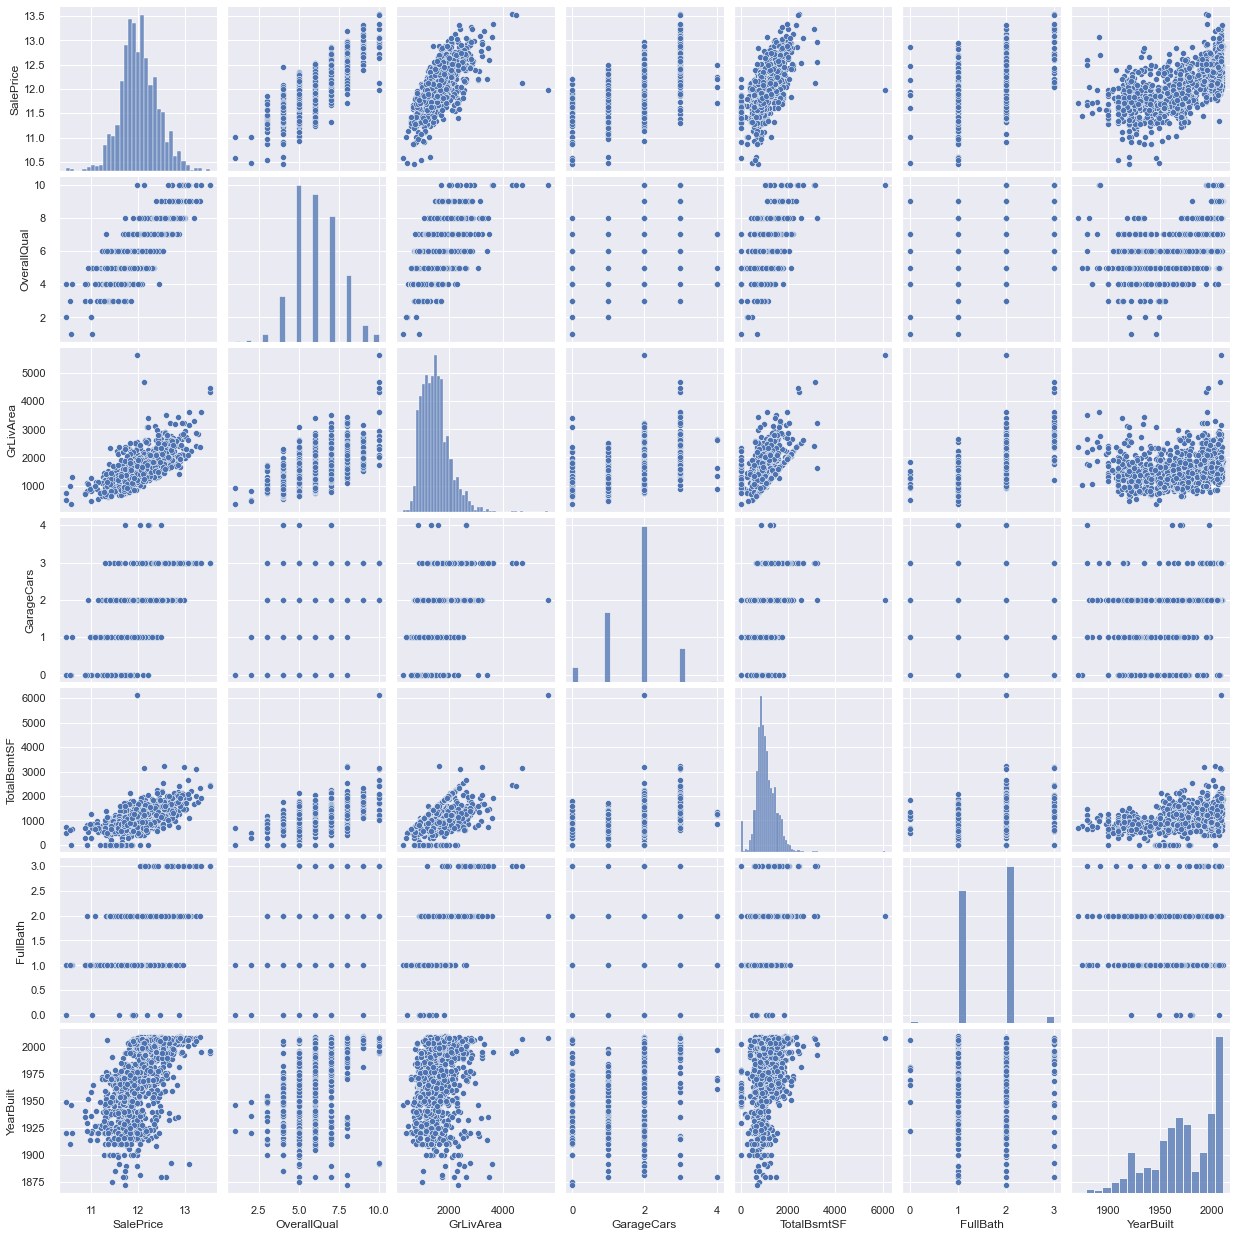

In [210]:

#histogram and scatter plot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], height = 2.5)
plt.show();

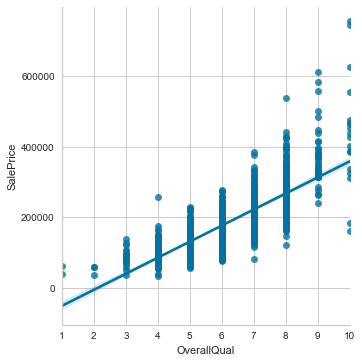

In [27]:
# OverallQual değikeni SalePrice ile ileri seviyede ilişkili(korelasyonu yüksek seviyede) olduğu tespit edilmiştir.
sns.lmplot(x='OverallQual',y='SalePrice',data=train) 

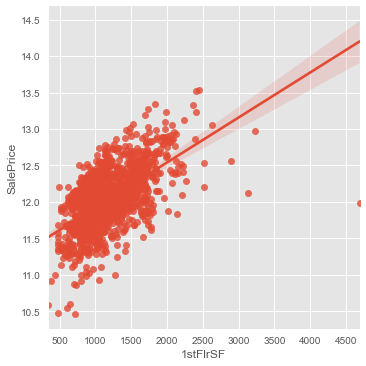

In [37]:
# 1stFlrSF değikeni SalePrice ile ileri seviyede ilişkili(korelasyonu yüksek seviyede) olduğu tespit edilmiştir.
sns.lmplot(x='1stFlrSF',y='SalePrice',data=train) 

#### SalePrice ile GarageCars değişkenlerinin Boxplot Grafik Analizi

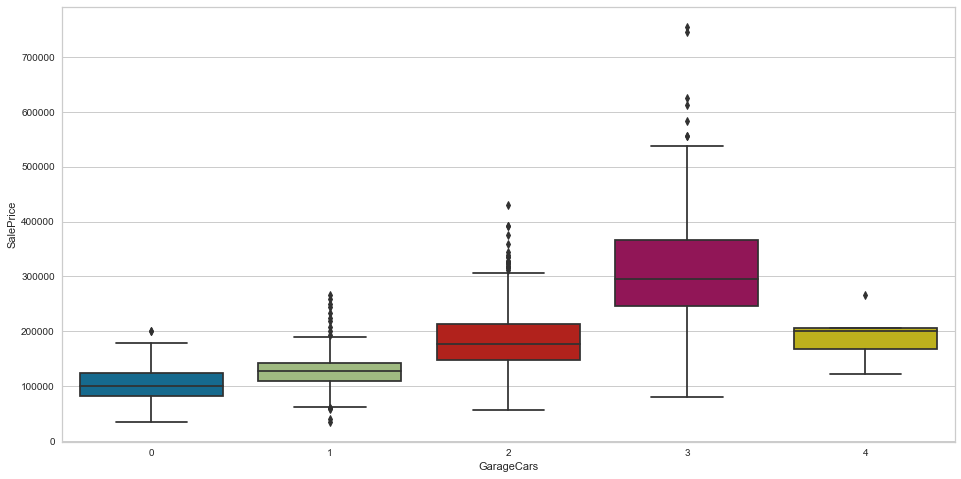

In [28]:
plt.figure(figsize=(16,8))
sns.boxplot(x='GarageCars',y='SalePrice',data=train)
plt.show()

#### SalePrice ile GarageArea değişkenlerinin lmplot Korelasyon Grafik Analizi

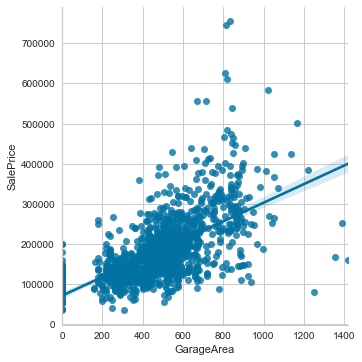

In [29]:
sns.lmplot(x='GarageArea',y='SalePrice',data=train)

#### FullBath ile SalePrice değişkenlerinin barplot Grafik Analizi

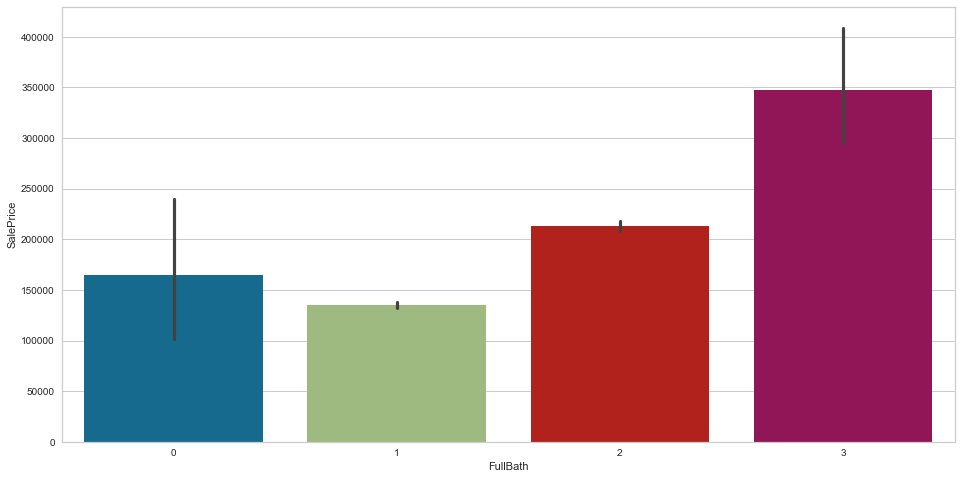

In [30]:
plt.figure(figsize=(16,8))
sns.barplot(x='FullBath',y = 'SalePrice',data=train)
plt.show()

## Eğitim Veri Setinde Missing Value (Eksik Gözlem) Tespiti

### Eksik Verinin Olma Durumunun Sorgulanması

In [31]:
train.isnull().values.any()

True

In [33]:
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

### Eksik Verilerin Grafiği

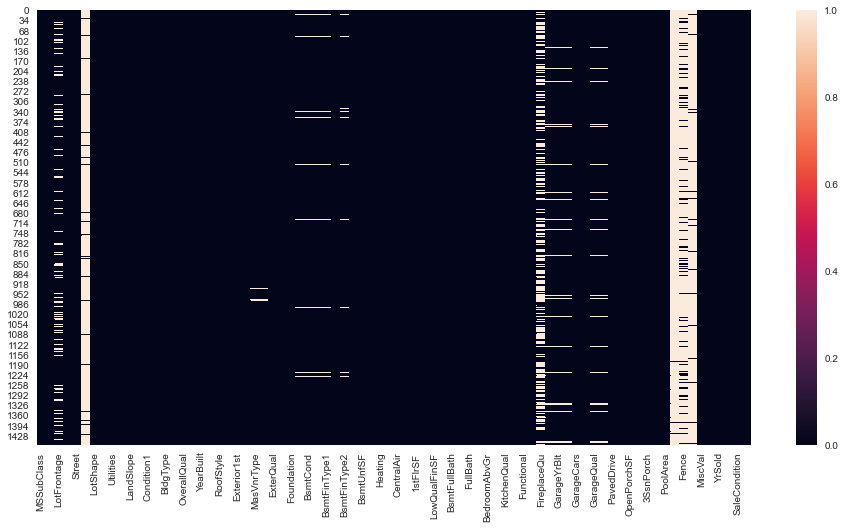

In [34]:
plt.figure(figsize =(16,8)) # çizim grafiğine ait çerçeve belrleme kodu
sns.heatmap(train.isnull()) # seaborn kütüphanesinden bulunan heatmap gösel grafiği
plt.show()

### Eğitim Veri Setinde Eksik Verinin Hangi Değişkenlerde Olduğunun Belirlenmesi (n), (%)

In [35]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Toplam', 'Yüzde'])
missing_data.head(25)

,Toplam,Yüzde
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


Tablo değeri incelendiğinde bazı parametrelerin çok fazla eksik değeri var. Bu değişkenler verilerden çıkarılmıştır.Toplam değeri 81'den büyük olan parametreleri bırakılmıştır.

### Fonksiyon değeri olan show_missing_values() ile Verinin Kayıp Değer Analizi

In [36]:
#Veri setindeki özelliklerin eksik değerlerini sayısal ve
#görsel olarak verir.
def show_missing_values(function_data):
#Veri setindeki eksik değerleri bulalım
    number_of_sample=function_data.shape[0]
    check_isnull=function_data.isnull().sum()
    
    check_isnull=check_isnull[check_isnull!=0].sort_values(ascending=False)

    if check_isnull.shape[0]==0:
        print("Veri setinde eksik bilgi yoktur")
        print(check_isnull)
    else:
        print(check_isnull)
        f, ax = plt.subplots(figsize=(15, 6))
        plt.xticks(rotation='90')
        sns.barplot(x=check_isnull.index, y=check_isnull)
        plt.title("Eksik veri içeren özellilere ait eksik veri sayısı")

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


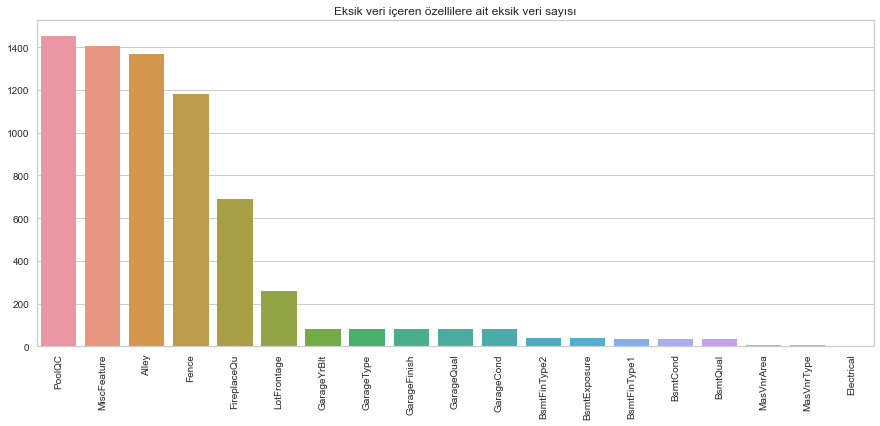

In [37]:
#train veri seti için eksik bilgiler gösterilsin
show_missing_values(train)

## Aykırı Değerlerin Çıkartılması

GrLivArea', TotalBsmtSF' ve '1stFlrSF', grafiklerinde(korelasyon grafikleri) görüldüğü gibi aykırı değerler vardır. Bu aykırı değerleri ayıklayalım. Toplamda iki aykırı değer vardır. 1460 olan örnek sayısı aykırı değerler çıkartıldıktan sonra 1458 olmuştur.

In [38]:
print("Aykırı değerler çıkarılmadan önce train.shape:",train.shape)

Aykırı değerler çıkarılmadan önce train.shape: (1460, 80)


In [39]:
train = train.drop(train[(train['GrLivArea']>3200) & (train['SalePrice']<300000)].index)

In [40]:
print("Aykırı değerler çıkarıldıktan sonra train.shape:",train.shape)

Aykırı değerler çıkarıldıktan sonra train.shape: (1456, 80)


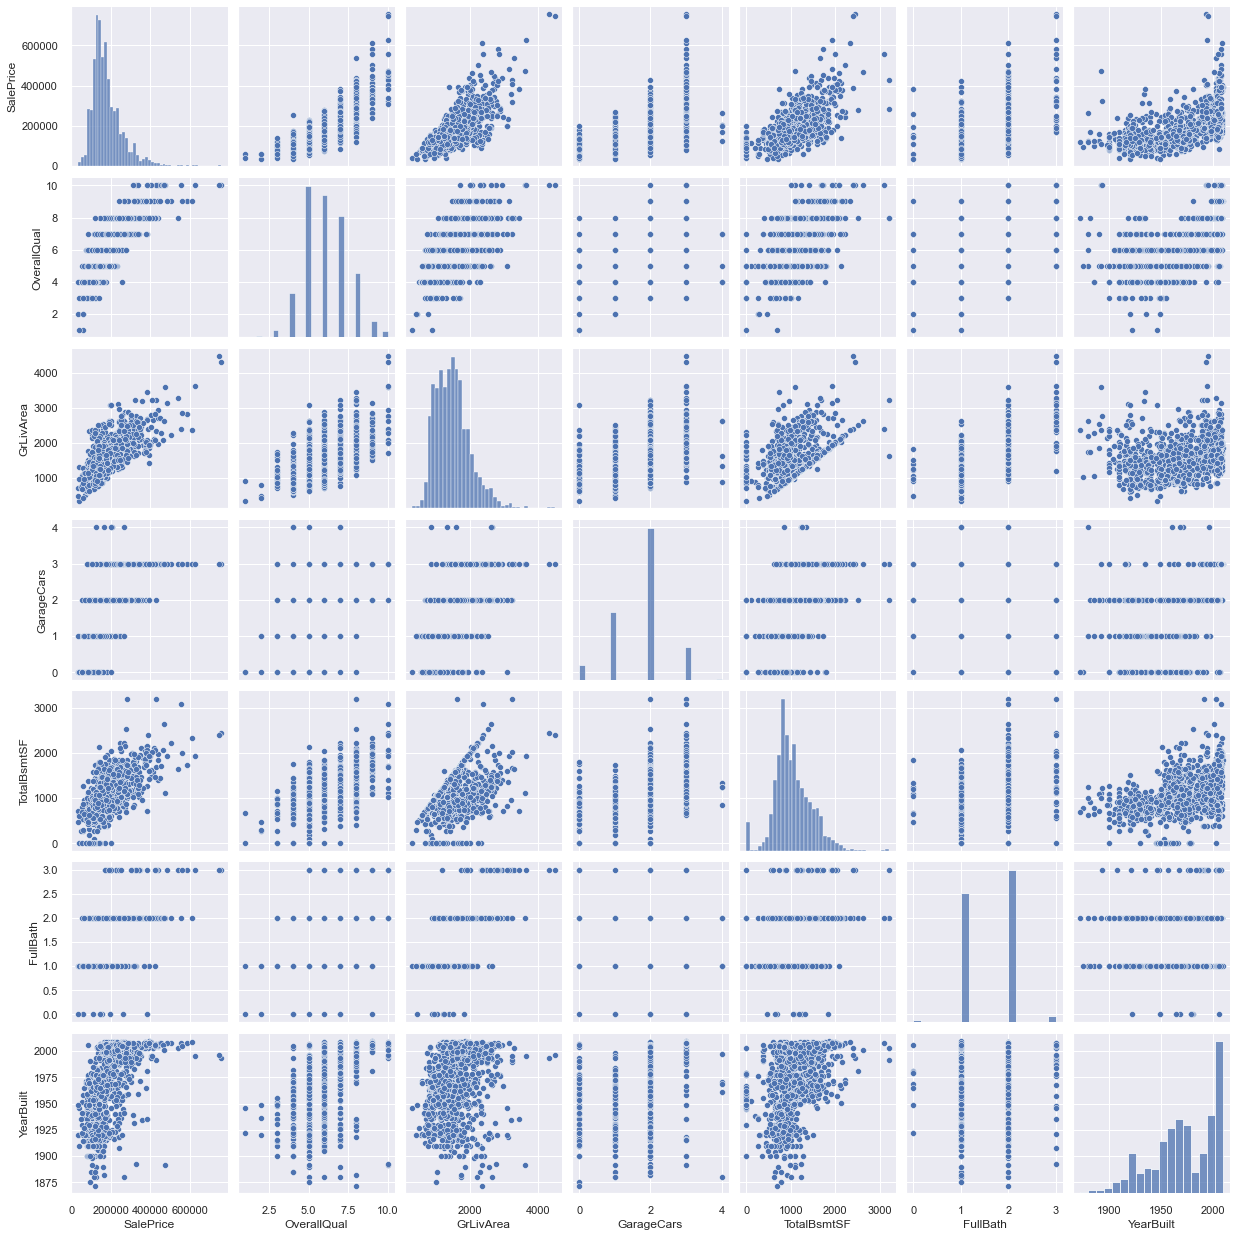

In [41]:
#histogram and scatter plot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], height = 2.5)
plt.show();

#### SalePrice ve TotalBsmtSF arasındaki korelasonu gösteren işlemler sonrası nihai lmplot Grafiği

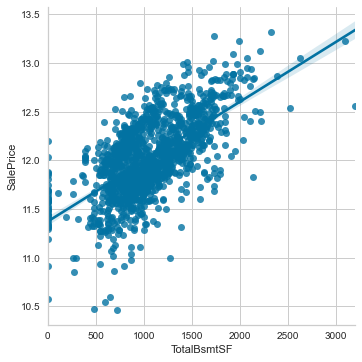

In [25]:
sns.lmplot(x='TotalBsmtSF',y='SalePrice',data=train)

#### SalePrice ve 1stFlrSF arasındaki korelasonu gösteren işlemler sonrası nihai lmplot Grafiği

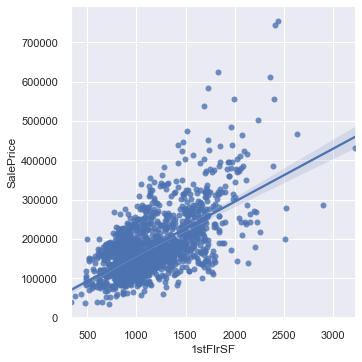

In [42]:
sns.lmplot(x='1stFlrSF',y='SalePrice',data=train)

## Özellik Mühendisliği

Korelasyon analizi ile en ilişkili parametreleri istatistiksel tablolarda ve grafiklerde sayısal değerler ile tespit ettik. Bu değerleri makine öğrenmesi modelimiz için özellikler olarak seçilmiştir.




In [52]:
corr = train.corr()

In [53]:
corr[corr['SalePrice']>0.3].index

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [43]:
train = train[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']]
test=test[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]

SalePrice değişkeni ile r= 0,30 korelasyon derecesi ve daha üst seviyede bulunan değişkenler özellk mühendisliği yöntemi ile modelleme tasarlanmıştır.

#### Kayıp Veri Analizi

In [55]:

total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
LotFrontage,257,0.177609
GarageYrBlt,80,0.055287
MasVnrArea,8,0.005529
2ndFlrSF,0,0.000000
OverallQual,0,0.000000
YearBuilt,0,0.000000
YearRemodAdd,0,0.000000
BsmtFinSF1,0,0.000000
TotalBsmtSF,0,0.000000
1stFlrSF,0,0.000000


In [56]:
#Eksik verilerin fazla olduğu değişkenlerin model dışına alınması işlemi
train = train.drop((missing_data[missing_data['Total'] > 81]).index,1)

Model oluşturma aşamasında özellik mühendisliği aşama metotlarını kulllanarak model oluşturma işlemi devam etmiştir.Tablodanda aanlaşılacağı üzre gibi eğitm veri setinde bazı parametrelerin çok fazla eksik değeri tespit edilmiştir.Bu nedenle modelimizin yalınlığı amacıyla bu değerler modelden çıkarılmıştır. Değişkenlerin 81 den fazla eksik değeri olanları modelimiz dışına çıkarılmıştır.

In [58]:
train.isnull().sum().sort_values(ascending=False).head(20)

GarageYrBlt     80
MasVnrArea       8
SalePrice        0
2ndFlrSF         0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
OpenPorchSF      0
FullBath         0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OverallQual      0
dtype: int64

In [59]:
#Test veri seti eksik veri analizi
total_test = test.isnull().sum().sort_values(ascending=False)
percent_test = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_test, percent_test], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
MasVnrArea,15,0.010281
TotalBsmtSF,1,0.000685
GarageArea,1,0.000685
GarageCars,1,0.000685
BsmtFinSF1,1,0.000685
OverallQual,0,0.000000
YearBuilt,0,0.000000
YearRemodAdd,0,0.000000


In [60]:
#Eksik verilerin fazla olduğu değişkenlerin model dışına alınması işlemi
test = test.drop((missing_data[missing_data['Total'] > 78]).index,1)

Model oluşturma aşamasında özellik mühendisliği aşama metotlarını kulllanarak model oluşturma işlemi devam etmiştir.Tablodanda aanlaşılacağı üzre gibi bazı parametrelerin çok fazla eksik değeri tespit edilmiştir.Bu nedenle modelimizin yalınlığı amacıyla test veri setinde bu değerler modelden çıkarılmıştır. Değişkenlerin 81 den fazla eksik değeri olanları modelimiz dışına çıkarılmıştır.

In [61]:
test.isnull().sum().sort_values(ascending=False).head(20)

GarageYrBlt     78
MasVnrArea      15
GarageArea       1
GarageCars       1
BsmtFinSF1       1
TotalBsmtSF      1
OpenPorchSF      0
1stFlrSF         0
YearBuilt        0
YearRemodAdd     0
GrLivArea        0
2ndFlrSF         0
WoodDeckSF       0
FullBath         0
TotRmsAbvGrd     0
Fireplaces       0
OverallQual      0
dtype: int64

### Eksik Verilerin İşlenmesi

#### Kategorik Verilerin Dönüştürülmesi İşlemi

In [63]:
categorical_feature_mask = train.dtypes==object
categorical_cols = train.columns[categorical_feature_mask].tolist()

In [37]:
categorical_cols

[]

In [64]:
categorical_feature_mask_test = test.dtypes==object
categorical_cols_test = test.columns[categorical_feature_mask_test].tolist()


In [65]:
train.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,7,2003,2003,196.0,706,856,856,854,1710,2,8,0,2003.0,2,548,0,61,12.247699
1,6,1976,1976,0.0,978,1262,1262,0,1262,2,6,1,1976.0,2,460,298,0,12.109016
2,7,2001,2002,162.0,486,920,920,866,1786,2,6,1,2001.0,2,608,0,42,12.317171
3,7,1915,1970,0.0,216,756,961,756,1717,1,7,1,1998.0,3,642,0,35,11.849405
4,8,2000,2000,350.0,655,1145,1145,1053,2198,2,9,1,2000.0,3,836,192,84,12.429220


In [66]:
test.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
0,5,1961,1961,0.0,468.0,882.0,896,0,896,1,5,0,1961.0,1.0,730.0,140,0
1,6,1958,1958,108.0,923.0,1329.0,1329,0,1329,1,6,0,1958.0,1.0,312.0,393,36
2,5,1997,1998,0.0,791.0,928.0,928,701,1629,2,6,1,1997.0,2.0,482.0,212,34
3,6,1998,1998,20.0,602.0,926.0,926,678,1604,2,7,1,1998.0,2.0,470.0,360,36
4,8,1992,1992,0.0,263.0,1280.0,1280,0,1280,2,5,0,1992.0,2.0,506.0,0,82


Eğitim Veri Seti değişkenlerine ait eksik değerler değişkene ait ortalama değerleri ile doldurulmuştur.

In [67]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())

Model için özellik mühendisliği sürecini devam ettrilmiştir. Bunun için korelasyon matrisini kullanacağız ve en çok satış fiyatı ile ilişkili olanı seçeceğiz.

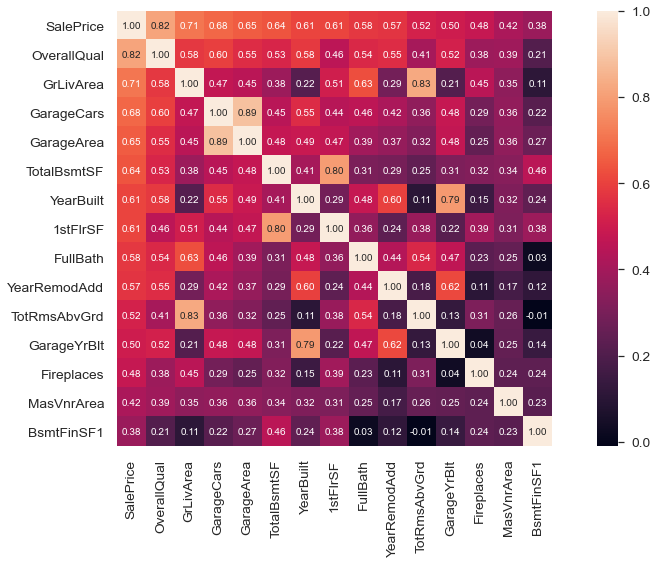

In [68]:
#saleprice correlation matrix
k = 15 #number of variables for heatmap
plt.figure(figsize=(16,8))
corrmat = train.corr()
# picking the top 15 correlated features
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [69]:
train = train[cols]

In [70]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', 'YearBuilt', '1stFlrSF', 'FullBath', 'YearRemodAdd',
       'TotRmsAbvGrd', 'GarageYrBlt', 'Fireplaces', 'MasVnrArea',
       'BsmtFinSF1'],
      dtype='object')

In [71]:
test=test[cols.drop('SalePrice')]

In [72]:
test.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,YearBuilt,1stFlrSF,FullBath,YearRemodAdd,TotRmsAbvGrd,GarageYrBlt,Fireplaces,MasVnrArea,BsmtFinSF1
0,5,896,1.0,730.0,882.0,1961,896,1,1961,5,1961.0,0,0.0,468.0
1,6,1329,1.0,312.0,1329.0,1958,1329,1,1958,6,1958.0,0,108.0,923.0
2,5,1629,2.0,482.0,928.0,1997,928,2,1998,6,1997.0,1,0.0,791.0
3,6,1604,2.0,470.0,926.0,1998,926,2,1998,7,1998.0,1,20.0,602.0
4,8,1280,2.0,506.0,1280.0,1992,1280,2,1992,5,1992.0,0,0.0,263.0


Test veri Seti değişkenlerine ait eksik değerler değişkene ait ortalama değerleri ile doldurulmuştur.

In [47]:
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean())
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].mean())
test['GarageCars'] = test['GarageCars'].fillna(test['GarageCars'].mean())
test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].mean())
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean())
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())

### Verilerin eğitim ve test verileri olmak üzere ikiye ayrılma işlemi (%70 eğitim, % 30 test)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('SalePrice', axis=1), train['SalePrice'], test_size=0.3, random_state=101)

### Verinin Ölçeklendirilmesi

In [74]:
# we are going to scale to data

y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [76]:
X_train

array([[ 2.17200106,  2.52455343,  1.6574518 , ...,  2.11409158,
         4.62921664,  2.25743588],
       [-0.06483585, -0.51008551,  0.31557882, ..., -0.96648535,
         0.25272366,  0.50193923],
       [-0.06483585, -0.30984063, -2.36816714, ..., -0.96648535,
        -0.61534107, -1.02538942],
       ...,
       [ 0.68077645, -0.02289177,  0.31557882, ...,  0.57380311,
        -0.01854657,  1.12125237],
       [ 0.68077645,  0.93498065,  1.6574518 , ...,  0.57380311,
        -0.61534107, -1.02538942],
       [-0.06483585,  0.36521171,  0.31557882, ..., -0.96648535,
         0.0839333 ,  0.15037425]])

## Lineer Regresyon

In [51]:
lm = LinearRegression()

### Modeli Oluşturma ve Eğitme

In [52]:
lm.fit(X_train,y_train)
print(lm)

LinearRegression()


In [53]:
# print the intercept
print(lm.intercept_)

[1.30791537e-16]


### Modelin Değerlendirilmesi

Modeli, katsayıların yorumlnması vee kontrol edilerek değerlendirilemsi işlemi

In [54]:
print(lm.coef_)

[[ 0.3006152   0.3294042   0.06134552  0.08743354  0.14207659  0.1535908
  -0.01485055 -0.0145934   0.12445747 -0.00195905 -0.05027141  0.08781189
  -0.00868621  0.12931827]]


### Model Üzerinden Tahminleme İşlemi

In [55]:
lineer_predictions = lm.predict(X_test)
lineer_predictions= lineer_predictions.reshape(-1,1)

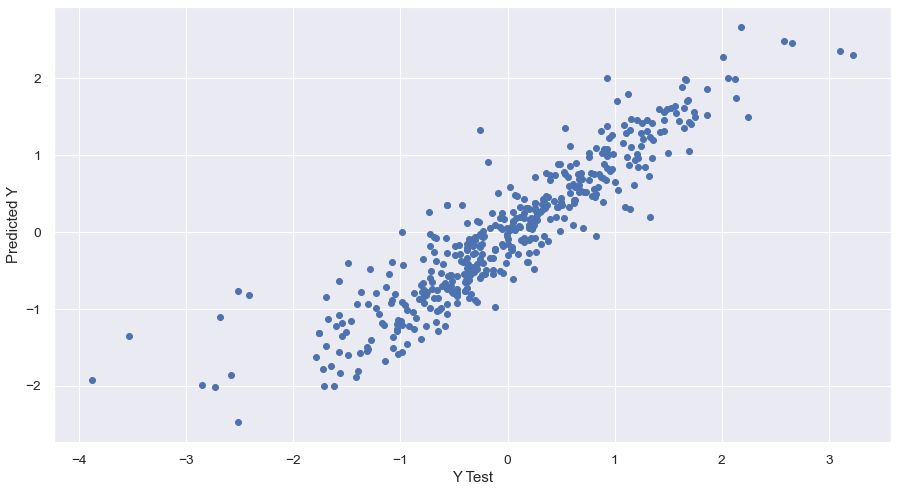

In [56]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,lineer_predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

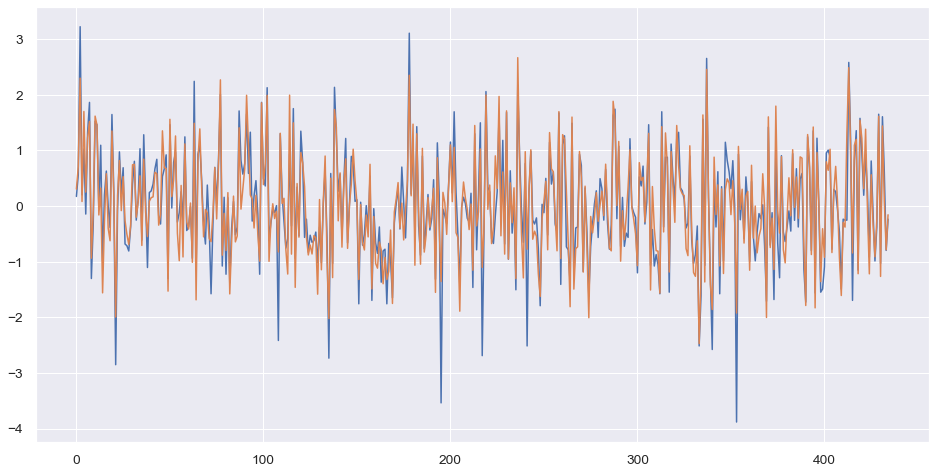

In [57]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(lineer_predictions, label = 'predict')
plt.show()

### Regresyon Değerlendirme Metrikleri

Mean Absolute Error (MAE) :Hataların mutlak değerinin ortalamasıdır.

1𝑛∑𝑖=1𝑛|𝑦𝑖−𝑦̂ 𝑖|

Mean Squared Error (MSE) : Karesel hataların ortalamasıdır.

1𝑛∑𝑖=1𝑛(𝑦𝑖−𝑦̂ 𝑖)2

Root Mean Squared Error (RMSE) :karesel hataların ortalamasının kareköküdür.

1𝑛∑𝑖=1𝑛(𝑦𝑖−𝑦̂ 𝑖)

Metriklerin Karşılaştırılması:

MAE, anlaşılması en kolay olan yöntemdir, çünkü bu ortalama bir hatadır. MSE, MAE'den daha popülerdir çünkü MSE, gerçek dünyada yararlı olma eğiliminde olan daha büyük hataları minimize eder. RMSE, MSE'den daha popülerdir, çünkü RMSE "y" birimlerinde yorumlanabilir. Bunların hepsi kayıp fonksiyonlarıdır, çünkü onları en aza indirme amacı makine öğrenmesinin en elzem başlığıdır.Modelimizin performansını ölçmek için Root Mean Squared Error (RMSE) kullanacağız.

### Metrik Analizi

In [107]:
print('MAE:', metrics.mean_absolute_error(y_test, lineer_predictions))
print('MSE:', metrics.mean_squared_error(y_test, lineer_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lineer_predictions)))
lm_RMSE=np.sqrt(metrics.mean_squared_error(y_test, lineer_predictions))

MAE: 0.28889326180003416
MSE: 0.16370514984121912
RMSE: 0.4046049305695855


In [108]:
lm_R2score=r2_score(y_test, lineer_predictions)
lm_R2score

0.8362948501587809

## Decision Tree Regresyon-Karar Ağacı Regresyon Uygulaması

In [60]:
dtreg = DecisionTreeRegressor(random_state = 100)
dtreg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=100)

In [61]:
dtr_pred = dtreg.predict(X_test)
dtr_pred= dtr_pred.reshape(-1,1)

In [109]:
print('MAE:', metrics.mean_absolute_error(y_test, dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))
dtr_RMSE=np.sqrt(metrics.mean_squared_error(y_test, dtr_pred))

MAE: 0.40881592794508903
MSE: 0.329313577384326
RMSE: 0.57385849944418


In [110]:
dtr_R2score=r2_score(y_test, dtr_pred)
dtr_R2score

0.670686422615674

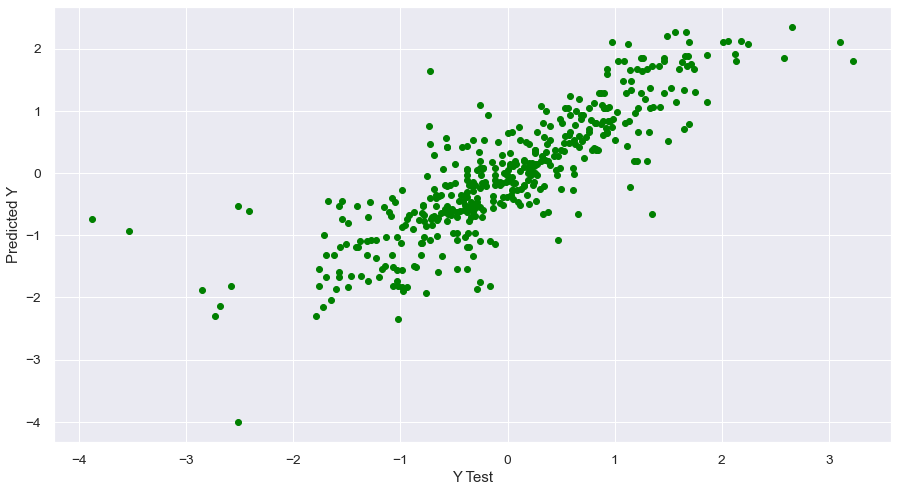

In [88]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,dtr_pred,c='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

## Linear Support Vector Machine Regresyon (Linear SVR)

In [64]:
lsvr = LinearSVR(verbose=0, dual=True)
lsvr.fit(X_train, y_train)

LinearSVR()

In [65]:
lsvr_pred = lsvr.predict(X_test)
lsvr_pred= lsvr_pred.reshape(-1,1)

In [105]:
print('MAE:', metrics.mean_absolute_error(y_test, lsvr_pred))
print('MSE:', metrics.mean_squared_error(y_test, lsvr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lsvr_pred)))
lsvr_RMSE=np.sqrt(metrics.mean_squared_error(y_test, lsvr_pred))

MAE: 0.2801412640885685
MSE: 0.16629014049842455
RMSE: 0.40778688122403417


In [98]:
lsvr_R2score=r2_score(y_test, lsvr_pred)
lsvr_R2score

0.8337098595015755

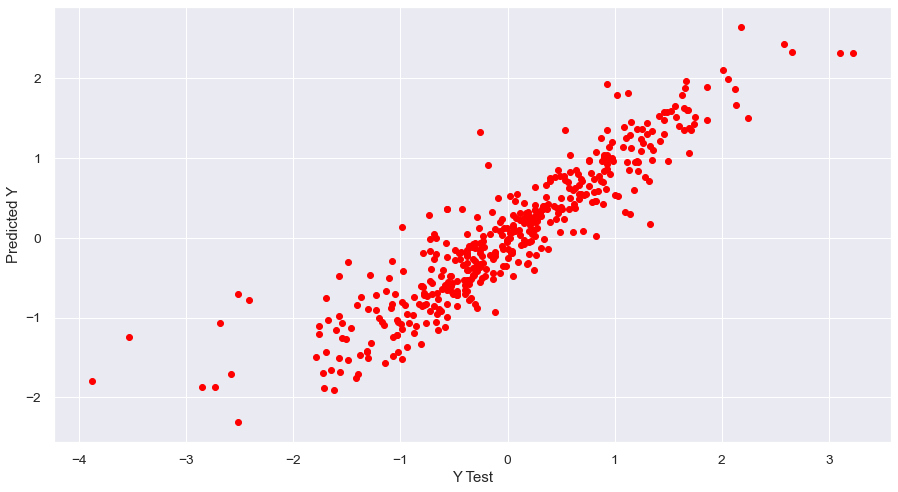

In [93]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,lsvr_pred, c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

## Ridge Regresyon

In [68]:
ridgereg = Ridge(alpha=0.05, normalize=True)
ridgereg.fit(X_train, y_train)

Ridge(alpha=0.05, normalize=True)

In [69]:
ridge_pred = ridgereg.predict(X_test)
ridge_pred= ridge_pred.reshape(-1,1)

In [102]:
print('MAE:', metrics.mean_absolute_error(y_test, ridge_pred))
print('MSE:', metrics.mean_squared_error(y_test, ridge_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))
ridge_RMSE=np.sqrt(metrics.mean_squared_error(y_test, ridge_pred))

MAE: 0.28662360035885437
MSE: 0.16277851322853956
RMSE: 0.4034581926650388


In [128]:
ridge_R2score=r2_score(y_test, ridge_pred)
ridge_R2score

0.8372214867714605

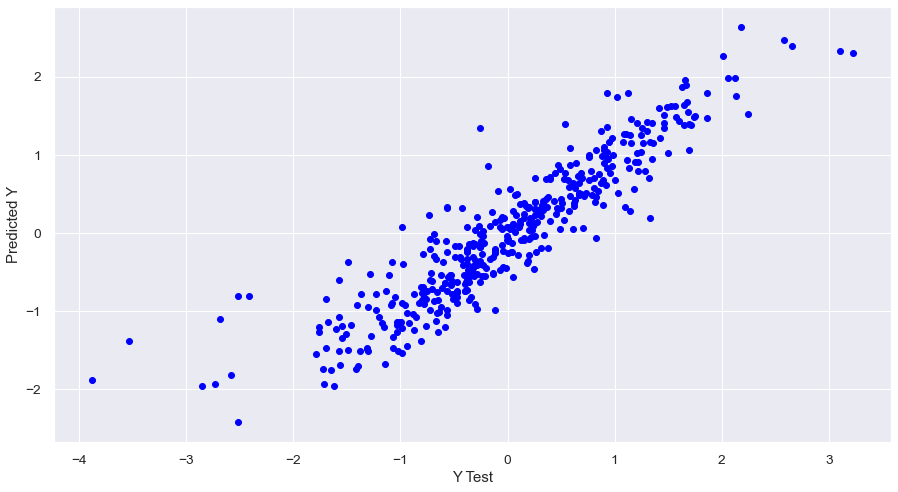

In [72]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,ridge_pred, c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

## Lasso Regresyon

In [74]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [75]:
lasso_pred = lassocv.predict(X_test)
lasso_pred= lasso_pred.reshape(-1,1)

In [111]:
print('MAE:', metrics.mean_absolute_error(y_test, lasso_pred))
print('MSE:', metrics.mean_squared_error(y_test, lasso_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)))
lasso_RMSE=np.sqrt(metrics.mean_squared_error(y_test, lasso_pred))

MAE: 0.28827923531816346
MSE: 0.16396692648428524
RMSE: 0.4049282979544468


In [112]:
lasso_R2score=r2_score(y_test, lasso_pred)
lasso_R2score

0.8360330735157148

## Model Karşılaştırma

### RMSE Değerlerini Model Bazlı Karşılaştırma İşlemi

In [133]:
Label_list = ['Lineer Regression  RMSE','Decsion Tree Regression RMSE','Linear SVR RMSE','Ridge Regression RMSE','Lasso Regression RMSE']
Data_List = [0.4046049305695855,0.57385849944418, 0.40778688122403417,0.4034581926650388,0.4049282979544468]
Model_karsilastirma_RMSE= pd.Series(Data_List,Label_list)
Model_karsilastirma_RMSE


Lineer Regression  RMSE         0.404605
Decsion Tree Regression RMSE    0.573858
Linear SVR RMSE                 0.407787
Ridge Regression RMSE           0.403458
Lasso Regression RMSE           0.404928
dtype: float64

### R Square Değerlerini Model Bazlı Karşılaştırma İşlemi

In [134]:
print('Lineer R2 Score Değeri: ',lm_R2score)
print('Decision Tree R2 Score Değeri: ',dtr_R2score)
print('Linear SVR R2 Score Değeri: ',lsvr_R2score)
print('Ridge R2 Score Değeri: ',ridge_R2score)
print('Lasso R2 Score Değeri: ',lasso_R2score)

Lineer R2 Score Değeri:  0.8362948501587809
Decision Tree R2 Score Değeri:  0.670686422615674
Linear SVR R2 Score Değeri:  0.8337098595015755
Ridge R2 Score Değeri:  0.8372214867714605
Lasso R2 Score Değeri:  0.8360330735157148


En yüksek tahmin gücüne %83,72 ile Ridge Regresyon Modelinin sahip olduğu tespit edilmiştir.Sırasıyla Lineer Regresyon Modeli,Lasso Regresyon Modeli,Linear SVR Modeli ve en son olarak Decision Tree  Regresyon Modelinin tahmin gücü sıralaması tespit edilmiştir.

## Test Veri Seti Kullanılarak Modellerin Tahmin Değerlerinin Uygulanması ve Veri Setlerinin Oluşturulması Aşaması 

#### Test Veri Setinin ID birleştirme ve Model Uyum Eşleştirme İşlemi

In [78]:
a = pd.DataFrame(test_ids, columns=['Id'])

In [79]:
test = sc_X.fit_transform(test)

In [288]:
test.shape

(1459, 14)

### Lineer Regresyon Veri Seti Model Çıktı Uygulaması

In [289]:
test_prediction_lineer=lm.predict(test)
test_prediction_lineer= test_prediction_lineer.reshape(-1,1)

In [290]:
test_prediction_lineer

array([[-0.82819822],
       [-0.27047566],
       [ 0.19145171],
       ...,
       [ 0.06006234],
       [-0.87634856],
       [ 0.97407244]])

In [291]:
test_prediction_lineer =sc_y.inverse_transform(test_prediction_lineer)

In [292]:
test_prediction_lineer= pd.DataFrame(test_prediction_lineer, columns=['SalePrice'])

In [293]:
test_prediction_lineer = pd.DataFrame(np.expm1(test_prediction_lineer))

In [294]:
test_prediction_lineer.head()

,SalePrice
0,117009.443616
1,145960.133286
2,175289.577496
3,184853.683335
4,187157.611445


In [296]:
sonuc = pd.concat([a,test_prediction_lineer], axis=1)

In [297]:
sonuc.head()

,Id,SalePrice
0,1461,117009.443616
1,1462,145960.133286
2,1463,175289.577496
3,1464,184853.683335
4,1465,187157.611445


In [309]:
sonuc.to_csv('veriseti_ln.csv',index=False)

### Decision Tree Regresyon(Karar Ağacı Regresyon) Veri Seti Model Çıktı Uygulaması

In [299]:
test_prediction_dtr=dtreg.predict(test)
test_prediction_dtr= test_prediction_dtr.reshape(-1,1)

In [300]:
test_prediction_dtr

array([[-0.90333836],
       [ 0.15301459],
       [ 0.12371553],
       ...,
       [ 0.01077974],
       [-1.75336241],
       [ 1.04332736]])

In [301]:
test_prediction_dtr =sc_y.inverse_transform(test_prediction_dtr)

In [302]:
test_prediction_dtr= pd.DataFrame(test_prediction_dtr, columns=['SalePrice'])

In [303]:
test_prediction_dtr = pd.DataFrame(np.expm1(test_prediction_dtr))

In [304]:
test_prediction_dtr.head()

,SalePrice
0,113575.677871
1,172639.059112
2,170645.627397
3,170645.627397
4,209101.294157


In [305]:
sonuc2 = pd.concat([a,test_prediction_dtr], axis=1)

In [306]:
sonuc2.head()

,Id,SalePrice
0,1461,113575.677871
1,1462,172639.059112
2,1463,170645.627397
3,1464,170645.627397
4,1465,209101.294157


In [310]:
sonuc2.to_csv('veriseti_dtr.csv',index=False)

### Ridge Regresyon Veri Seti Model Çıktı Uygulaması

In [80]:
test_prediction_ridge=ridgereg.predict(test)
test_prediction_ridge= test_prediction_ridge.reshape(-1,1)

In [81]:
test_prediction_ridge

array([[-0.83245436],
       [-0.29640028],
       [ 0.17745829],
       ...,
       [ 0.07948235],
       [-0.88165401],
       [ 0.97235776]])

In [82]:
test_prediction_ridge =sc_y.inverse_transform(test_prediction_ridge)

In [83]:
test_prediction_ridge= pd.DataFrame(test_prediction_ridge, columns=['SalePrice'])

In [84]:
test_prediction_ridge= pd.DataFrame(np.expm1(test_prediction_ridge))

In [85]:
test_prediction_ridge.head()

,SalePrice
0,116812.201220
1,144467.868747
2,174319.952050
3,184910.254514
4,185532.036676


In [88]:
sonuc3 = pd.concat([a,test_prediction_ridge], axis=1)

In [89]:
sonuc3.head()

,Id,SalePrice
0,1461,116812.201220
1,1462,144467.868747
2,1463,174319.952050
3,1464,184910.254514
4,1465,185532.036676


In [90]:
sonuc3.to_csv('veriseti_ridge.csv',index=False)

### Linear Support Vector Machine Regresyon (Linear SVR) Veri Seti Model Çıktı Uygulaması

In [321]:
test_prediction_lsvr=lsvr.predict(test)
test_prediction_lsvr= test_prediction_lsvr.reshape(-1,1)

In [322]:
test_prediction_lsvr

array([[-0.73899238],
       [-0.21675553],
       [ 0.22130875],
       ...,
       [ 0.09445057],
       [-0.82306569],
       [ 0.97332184]])

In [323]:
test_prediction_lsvr =sc_y.inverse_transform(test_prediction_lsvr)

In [324]:
test_prediction_lsvr= pd.DataFrame(test_prediction_lsvr, columns=['SalePrice'])

In [325]:
test_prediction_lsvr= pd.DataFrame(np.expm1(test_prediction_lsvr))

In [326]:
test_prediction_lsvr.head()

,SalePrice
0,121221.020301
1,149101.598423
2,177376.486742
3,185593.529398
4,184364.076264


In [327]:
sonuc4 = pd.concat([a,test_prediction_lsvr], axis=1)

In [328]:
sonuc4.head()

,Id,SalePrice
0,1461,121221.020301
1,1462,149101.598423
2,1463,177376.486742
3,1464,185593.529398
4,1465,184364.076264


In [329]:
sonuc4.to_csv('veriseti_lsvr.csv',index=False)

### Lasso Regresyon Veri Seti Model Çıktı Uygulaması

In [332]:
test_prediction_lasso=lassocv.predict(test)
test_prediction_lasso= test_prediction_lasso.reshape(-1,1)

In [333]:
test_prediction_lasso

array([[-0.84314007],
       [-0.27580587],
       [ 0.17871285],
       ...,
       [ 0.03065635],
       [-0.88996125],
       [ 0.95718236]])

In [334]:
test_prediction_lasso =sc_y.inverse_transform(test_prediction_lasso)

In [335]:
test_prediction_lasso= pd.DataFrame(test_prediction_lasso, columns=['SalePrice'])

In [336]:
test_prediction_lasso= pd.DataFrame(np.expm1(test_prediction_lasso))

In [337]:
test_prediction_lasso.head()

,SalePrice
0,116318.457729
1,145652.064256
2,174406.662644
3,184263.647315
4,187653.715108


In [338]:
sonuc5 = pd.concat([a,test_prediction_lasso], axis=1)

In [339]:
sonuc5.head()

,Id,SalePrice
0,1461,116318.457729
1,1462,145652.064256
2,1463,174406.662644
3,1464,184263.647315
4,1465,187653.715108


In [340]:
sonuc5.to_csv('veriseti_lasso.csv',index=False)